In [1]:
import json 
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import datasets, layers, models
from keras.preprocessing.text import Tokenizer
#import padding sequence 
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,GlobalAveragePooling1D,Flatten

In [2]:
with open("Sarcasm.json", 'r') as f:
    datastore = json.load(f)

In [3]:
# Initialize lists
sentences = [] 
labels = []
# Append elements in the dictionaries into each list
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [4]:
# Number of examples to use for training
training_size = 80000
# Vocabulary size of the tokenizer
vocab_size = 80000
oov_tok = "<OOV>"
# Maximum length of the padded sequences
max_length = 32
padding_type = 'post'
# Output dimensions of the Embedding layer
embedding_dim = 16

In [5]:
# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [6]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters for padding and OOV tokens
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [7]:
import tensorflow as tf

# Initialize a GlobalAveragePooling1D (GAP1D) layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# Define sample array
sample_array = np.array([[[10,2],[1,3],[1,1]]])

# Print shape and contents of sample array
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array: {sample_array}')

# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')

shape of sample_array = (1, 3, 2)
sample array: [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer: (1, 2)
output array of gap1d_layer: [[4 2]]


In [8]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 16)            1280000   
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,280,433
Trainable params: 1,280,433
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
num_epochs = 10
# Train the model
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
835/835 - 5s - loss: 0.5096 - accuracy: 0.7377 - 5s/epoch - 5ms/step
Epoch 2/10
835/835 - 4s - loss: 0.2677 - accuracy: 0.8955 - 4s/epoch - 4ms/step
Epoch 3/10
835/835 - 4s - loss: 0.1820 - accuracy: 0.9326 - 4s/epoch - 5ms/step
Epoch 4/10
835/835 - 4s - loss: 0.1269 - accuracy: 0.9564 - 4s/epoch - 4ms/step
Epoch 5/10
835/835 - 3s - loss: 0.0885 - accuracy: 0.9722 - 3s/epoch - 4ms/step
Epoch 6/10
835/835 - 3s - loss: 0.0623 - accuracy: 0.9815 - 3s/epoch - 4ms/step
Epoch 7/10
835/835 - 3s - loss: 0.0444 - accuracy: 0.9872 - 3s/epoch - 4ms/step
Epoch 8/10
835/835 - 4s - loss: 0.0323 - accuracy: 0.9909 - 4s/epoch - 4ms/step
Epoch 9/10
835/835 - 4s - loss: 0.0228 - accuracy: 0.9945 - 4s/epoch - 4ms/step
Epoch 10/10
835/835 - 3s - loss: 0.0166 - accuracy: 0.9958 - 3s/epoch - 4ms/step


KeyError: 'val_accuracy'

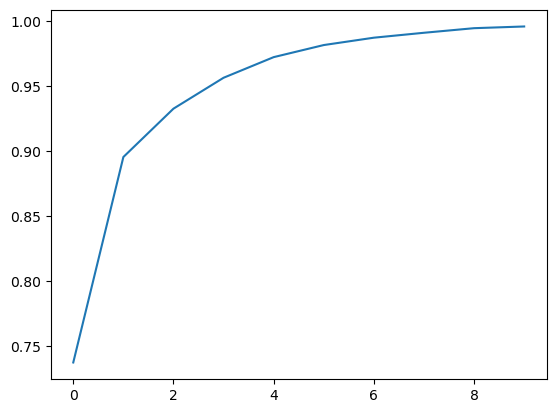

In [12]:
import matplotlib.pyplot as plt
# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [13]:
imput_text = "chlidren are the lifes of the parents"

In [14]:
imput_encoder = tokenizer.texts_to_sequences([imput_text])

In [15]:
pad_input = pad_sequences(imput_encoder, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [16]:
pridiction = model.predict(pad_input)

1/1 [==============================] - 0s 69ms/step


In [17]:
sarcasm_probability = pridiction[0]  # Assuming your model outputs a probability
if sarcasm_probability > 0.5:
    print("The input is sarcastic.")
else:
    print("The input is not sarcastic.")

The input is not sarcastic.
